<a href="https://colab.research.google.com/github/Joseline7/Pruebas_Imagenes_Medicas/blob/main/primerejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD 2 (Grupo 4)
Tarea Explorar el uso de Inteligencia Artificial en Imágenes Médicas, usando librería de Python

> Joseline Aguirre



Cargando las caracteristicas del GPU asignado

In [ ]:
!nvidia-smi

Sat Jun  5 05:57:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |   9710MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Importando Fastai

In [ ]:
import fastai

In [ ]:
from fastai.vision import *

Creando las variables de acuerdo a las carpetas en las cuales se encuentran la ruta

In [46]:
data_path = Path("./chest_xray").absolute()
model_path = Path("./model").absolute()
model_path1 = Path("./drive/MyDrive/model1").absolute()


Se crea una variable data en donde:
1.  Se toma en cuenta solo el 20% del total de las imagenes para poder empezar con la validación.
2.   Además, se selecciona el tamaño de la imagen.

In [ ]:
data = ImageDataBunch.from_folder(
          data_path,
          valid_pct=0.2,
          size=256,
          ds_tfms=get_transforms()
                ).normalize(imagenet_stats)

Se presenta el tipo de data en este caso es:
  fastai.vision.data.ImageDataBunch

In [ ]:
type(data)

fastai.vision.data.ImageDataBunch

En esta linea de código se hace referencia a las clases con las cuales se va a trabajar:

Normal    83 imagenes

Pneuminia 20 imagnes

In [ ]:
print(data.classes, len(data.train_ds), len(data.valid_ds))

['NORMAL', 'PNEUMONIA'] 83 20


En este se envía a enseñar un batch de 3

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

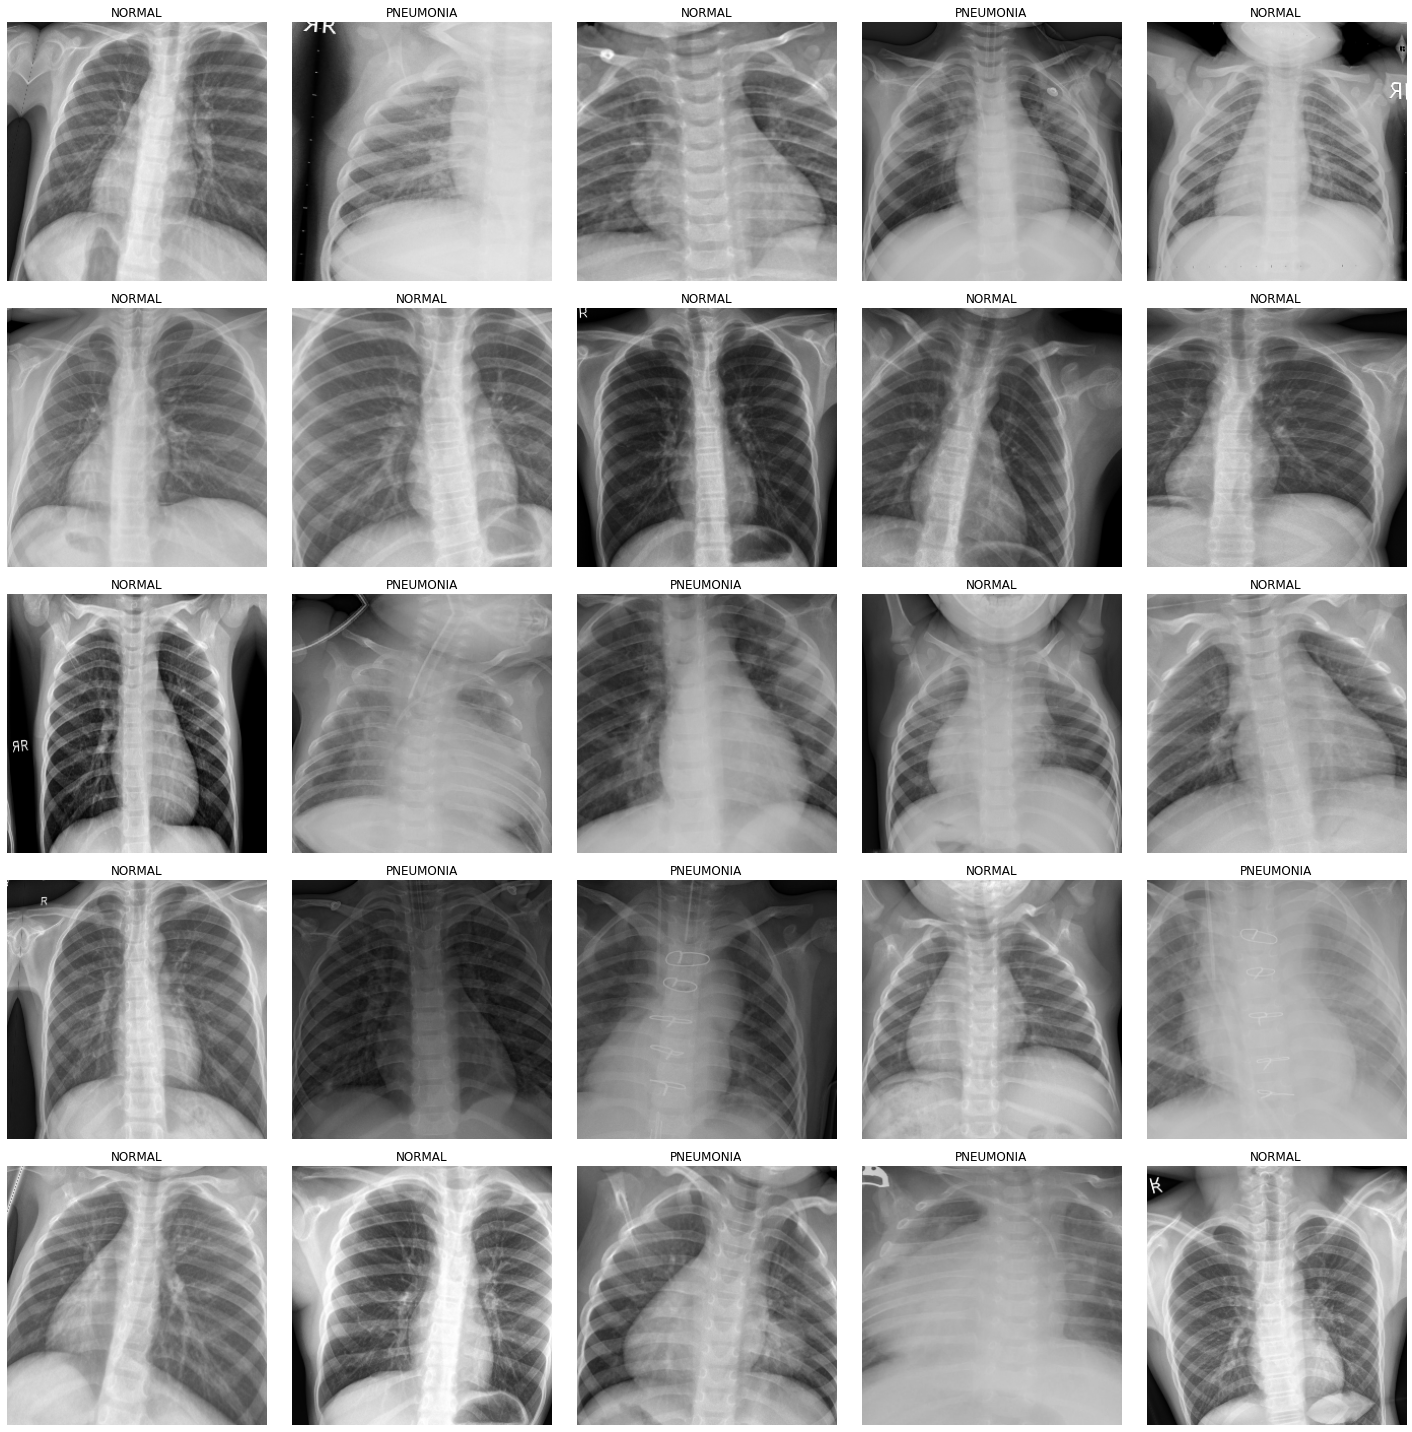

In [ ]:
data.show_batch(row=3)

# #Se inicia con la fase de entrenamiento
Se utiliza un modelo de convolución de tipo resnet50, con métricas que serán representadas por tasa de error esto de realiza en la carpeta model_path ya definida anteriormente.

In [ ]:
learn = cnn_learner(
          data,
          models.resnet50,
          metrics=error_rate,
          model_dir=model_path)

Se envía a entrenar un ciclo para 5 datos

In [ ]:
learn.fit_one_cycle(5)

Código utilizado para:

In [ ]:
learn.unfreeze()

# **Etapa de Entrenamiento**

Se ha cargado la tabla de acuerdo a los solicitado y tomando en como referencia las manifestaciones de este tipo de libreria.

In [ ]:
learn.lr_find()

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "T

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Mostramos la gráfica con los datos anteriormente registrados.

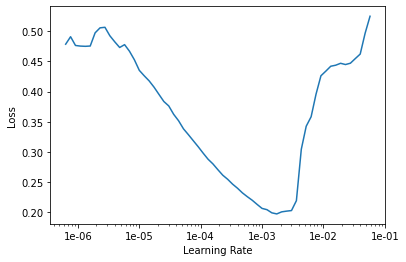

In [ ]:
learn.recorder.plot()

Se realiza un ciclo de 5 veces con un maximo loss rate (tasa de perdida)
Presición

In [38]:
learn.fit_one_cycle(5, max_lr=3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.277058,1.285264,0.150000,00:08
1,0.271303,0.753031,0.200000,00:07
2,0.318142,0.061868,0.050000,00:07
3,0.355767,0.023616,0.000000,00:08
4,0.366314,0.005967,0.000000,00:07


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

Exportar modelo en formato .pkl
Guardar en model_path

In [40]:
learn.export(model_path / "pneumonia.pkl")
learn.save(model_path / "pneumonia")

In [47]:
learn.export(model_path1 / "pneumonia.pkl")
learn.save(model_path1 / "pneumonia")